In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 8)
#plt.rcParams['font.size'] = 14

# Final Project, Part 2 - Initial EDA Brief

## [pybaseball](https://github.com/jldbc/pybaseball) 
Pull current and historical baseball statistics using Python (Statcast, Baseball Reference, FanGraphs)

`pybaseball` is a Python package for baseball data analysis. This package scrapes Baseball Reference, Baseball Savant, and FanGraphs so you don't have to. The package retrieves statcast data, pitching stats, batting stats, division standings/team records, awards data, and more. Data is available at the individual pitch level, as well as aggregated at the season level and over custom time periods. See the [docs](https://github.com/jldbc/pybaseball/tree/master/docs) for a comprehensive list of data acquisition functions.

**Statcast**

The statcast function retrieves pitch-level statcast data for a given date or range or dates.

statcast(start_dt=[yesterday's date], end_dt=None, team=None)

In [2]:
# Pull advanced metrics from Major League Baseball's Statcast system
#from pybaseball import statcast

# Look up a player's MLBAM, Retrosheet, FanGraphs, and Baseball Reference ID by name
#from pybaseball import playerid_lookup

## Exploratory Data Analysis in Pandas

Note: The new Statcast metrics are available beginning from the 2015 baseball season to the current season.  For the purpose of EDA and to get a feel for the data, I will be focusing on the 2016 Chicago Cubs data when they won the World Series. Then, I will download the 2015-2017 baseball seasons for all teams to be used in the data modeling.

### Reading a File

In [3]:
# Create data path variable for loading data
data_path = '/Users/yangweichle/Documents/General Assembly/Projects/Datasets/'

In [4]:
# Read file into DataFrame
# Note: header=0 disables the header from the file
cubs2016 = pd.read_csv(data_path + 'cubs2016.csv', header=0) # Comma-separated values file

### Examine the DataFrame

In [5]:
# Return the number of rows and columns (dimensionality) of the DataFrame
print('Rows: {}, Cols: {}'.format(cubs2016.shape[0], cubs2016.shape[1]))

Rows: 48513, Cols: 91


In [6]:
# Print a concise summary of a DataFrame including the index dtype and column dtypes, non-null values, and memory usage
# Note: Useful to quickly see if null values exist 
cubs2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48513 entries, 0 to 48512
Data columns (total 91 columns):
Unnamed: 0                         48513 non-null int64
index                              48513 non-null int64
pitch_type                         48453 non-null object
game_date                          48513 non-null object
release_speed                      48506 non-null float64
release_pos_x                      47330 non-null float64
release_pos_z                      47330 non-null float64
player_name                        48513 non-null object
batter                             48513 non-null float64
pitcher                            48513 non-null float64
events                             12309 non-null object
description                        48513 non-null object
spin_dir                           0 non-null float64
spin_rate_deprecated               0 non-null float64
break_angle_deprecated             0 non-null float64
break_length_deprecated            0 non-n

In [7]:
# Column names (which is "an index")
#cubs2016.columns

In [8]:
# Sort a DataFrame by multiple columns
# Note: ascending: sort ascending vs. descending; ascending=True is default
#       inplace=True changes the original DataFrame
cubs2016.sort_values(by=['game_date', 'game_pk', 'at_bat_number', 'pitch_number'], ascending=True, inplace=True)

In [9]:
# Print the first 5 rows and the last 5 rows of the DataFrame
cubs2016.head().append(cubs2016.tail())

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
48512,48512,20802,FF,2016-04-04,97.7,-2.3720,5.8985,Garrett Richards,451594.0,572070.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infield shift,Standard
48511,48511,20792,FF,2016-04-04,97.4,-2.3034,5.9534,Garrett Richards,451594.0,572070.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infield shift,Standard
48510,48510,20778,FT,2016-04-04,97.2,-2.4165,6.0376,Garrett Richards,518792.0,572070.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Strategic,Standard
48509,48509,20776,CH,2016-04-04,92.3,-2.4806,5.8740,Garrett Richards,450314.0,572070.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard
48508,48508,20762,FF,2016-04-04,99.3,-2.1138,5.8095,Garrett Richards,450314.0,572070.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard
4,4,40,FF,2016-10-02,96.3,-1.0191,6.0607,Carl Edwards Jr.,573113.0,605218.0,...,4.0,7.0,4.0,7.0,7.0,4.0,4.0,7.0,Standard,Standard
3,3,38,FF,2016-10-02,96.3,-1.0828,6.0432,Carl Edwards Jr.,573113.0,605218.0,...,4.0,7.0,4.0,7.0,7.0,4.0,4.0,7.0,Standard,Standard
2,2,36,CU,2016-10-02,80.5,-1.0758,6.2232,Carl Edwards Jr.,454975.0,605218.0,...,4.0,7.0,4.0,7.0,7.0,4.0,4.0,7.0,Standard,Standard
1,1,34,CU,2016-10-02,81.0,-0.9808,6.1297,Carl Edwards Jr.,454975.0,605218.0,...,4.0,7.0,4.0,7.0,7.0,4.0,4.0,7.0,Standard,Standard
0,0,32,FF,2016-10-02,94.7,-1.2033,6.1418,Carl Edwards Jr.,454975.0,605218.0,...,4.0,7.0,4.0,7.0,7.0,4.0,4.0,7.0,Standard,Standard


#### Identifying important columns to include in the DataFrame.

In [10]:
# Select multiple columns
# Note: release_speed = Pitch Velocity (MPH)
#       bb_type = Batted Ball Type
#       launch_speed = Exit Velocity (MPH)
#       launch_angle = Launch Angle (Degrees)
baseball_cols = ['game_date', 'home_team', 'away_team', 'player_name', 'pitcher', 'pitch_type', 'pitch_name', 'release_speed',
                 'batter', 'events', 'description', 'bb_type', 'des', 'launch_speed', 'launch_angle', 'hit_distance_sc'] 
cubs2016_new = cubs2016[baseball_cols]

In [11]:
# Return the number of rows and columns (dimensionality) of the DataFrame
print('Rows: {}, Cols: {}'.format(cubs2016_new.shape[0], cubs2016_new.shape[1]))

Rows: 48513, Cols: 16


In [12]:
# Print the first 5 rows of the DataFrame
cubs2016_new.head()

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,release_speed,batter,events,description,bb_type,des,launch_speed,launch_angle,hit_distance_sc
48512,2016-04-04,LAA,CHC,Garrett Richards,572070.0,FF,4-Seam Fastball,97.7,451594.0,NaN,ball,NaN,NaN,NaN,NaN,NaN
48511,2016-04-04,LAA,CHC,Garrett Richards,572070.0,FF,4-Seam Fastball,97.4,451594.0,double,hit_into_play_no_out,ground_ball,Dexter Fowler doubles (1) on a sharp ground ba...,98.1,-0.581,43.0
48510,2016-04-04,LAA,CHC,Garrett Richards,572070.0,FT,2-Seam Fastball,97.2,518792.0,field_out,hit_into_play,ground_ball,"Jason Heyward grounds out, shortstop Andrelton...",104.2,-32.868,4.0
48509,2016-04-04,LAA,CHC,Garrett Richards,572070.0,CH,Changeup,92.3,450314.0,NaN,swinging_strike,NaN,NaN,NaN,NaN,NaN
48508,2016-04-04,LAA,CHC,Garrett Richards,572070.0,FF,4-Seam Fastball,99.3,450314.0,NaN,foul,NaN,NaN,NaN,NaN,NaN


In [13]:
# Rename one or more columns in the original DataFrame rather than returning a new view
cubs2016_new = cubs2016_new.rename(columns={'release_speed': 'pitch_velocity',
                                            'bb_type': 'batted_ball_type',
                                            'launch_speed': 'exit_velocity'})

In [14]:
# Print a concise summary of a DataFrame including the index dtype and column dtypes, non-null values, and memory usage
# Note: Useful to quickly see if null values exist 
cubs2016_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48513 entries, 48512 to 0
Data columns (total 16 columns):
game_date           48513 non-null object
home_team           48513 non-null object
away_team           48513 non-null object
player_name         48513 non-null object
pitcher             48513 non-null float64
pitch_type          48453 non-null object
pitch_name          48453 non-null object
pitch_velocity      48506 non-null float64
batter              48513 non-null float64
events              12309 non-null object
description         48513 non-null object
batted_ball_type    8181 non-null object
des                 12309 non-null object
exit_velocity       12506 non-null float64
launch_angle        12506 non-null float64
hit_distance_sc     11265 non-null float64
dtypes: float64(6), object(10)
memory usage: 6.3+ MB


### Handling Missing Values

In [15]:
# Count the missing values in each column of a DataFrame - sum() works because True is 1 and False is 0
cubs2016_new.isnull().sum()

game_date               0
home_team               0
away_team               0
player_name             0
pitcher                 0
pitch_type             60
pitch_name             60
pitch_velocity          7
batter                  0
events              36204
description             0
batted_ball_type    40332
des                 36204
exit_velocity       36007
launch_angle        36007
hit_distance_sc     37248
dtype: int64

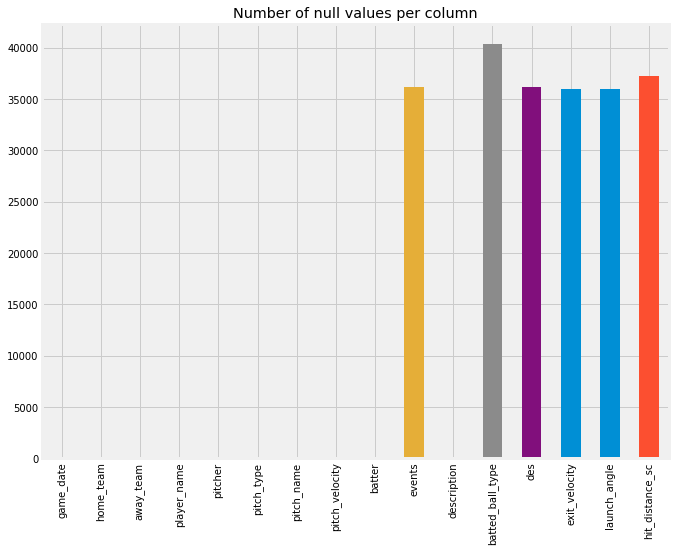

In [16]:
# Create a vertical bar plot by number of missing values per column using matplotlib
# Note: figsize: a tuple (width, height) in inches
cubs2016_new.isnull().sum().plot.bar(figsize=(10, 8));
plt.title('Number of null values per column');

#### Approach for excluding records:

Each record represents an interaction between a pitcher and a batter (i.e., a pitch thrown by the pitcher to the batter).  The goal is to keep any interaction for which Statcast could provide valid measurements for the metrics launch_speed, launch_angle, and hit_distance_sc.

In order to do so, non-batted ball records will be excluded. <br>

- Drop all 'events' = NaN which represent interactions where the batter did not make contact with the ball or the batter made contact with the ball but it was hit foul (e.g., ball, foul, called strike, swinging strike, blocked ball, foul tip, intentional ball, foul bunt, swinging strike blocked, missed bunt, pitchout)

- Drop all 'batted_ball_type' = NaN which represents other remaining events where there was not a batted ball (e.g., strikeout, walk, hit by pitch, intentional walk, caught stealing, etc.)

#### Examine 'events' column for missingness.

In [17]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
cubs2016_new.events.value_counts(dropna=False)

NaN                           36204
field_out                      4887
strikeout                      2776
single                         1629
walk                           1082
double                          498
home_run                        363
force_out                       239
grounded_into_double_play       205
hit_by_pitch                    159
field_error                     105
sac_bunt                         72
sac_fly                          71
intent_walk                      69
triple                           45
double_play                      34
fielders_choice_out              24
caught_stealing_2b               23
fielders_choice                   7
strikeout_double_play             4
other_out                         3
pickoff_caught_stealing_2b        3
pickoff_2b                        2
caught_stealing_home              2
pickoff_1b                        2
sac_fly_double_play               1
caught_stealing_3b                1
sac_bunt_double_play        

In [18]:
# Detect missing values in a Series
# Note: True if missing, False if not missing
#cubs2016_new.events.isna() # alias of isnull()
null_events = cubs2016_new.events.isnull()
cubs2016_new[null_events]

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,pitch_velocity,batter,events,description,batted_ball_type,des,exit_velocity,launch_angle,hit_distance_sc
48512,2016-04-04,LAA,CHC,Garrett Richards,572070.0,FF,4-Seam Fastball,97.7,451594.0,NaN,ball,NaN,NaN,NaN,NaN,NaN
48509,2016-04-04,LAA,CHC,Garrett Richards,572070.0,CH,Changeup,92.3,450314.0,NaN,swinging_strike,NaN,NaN,NaN,NaN,NaN
48508,2016-04-04,LAA,CHC,Garrett Richards,572070.0,FF,4-Seam Fastball,99.3,450314.0,NaN,foul,NaN,NaN,NaN,NaN,NaN
48506,2016-04-04,LAA,CHC,Garrett Richards,572070.0,FF,4-Seam Fastball,98.6,519203.0,NaN,ball,NaN,NaN,NaN,NaN,NaN
48505,2016-04-04,LAA,CHC,Garrett Richards,572070.0,FF,4-Seam Fastball,99.0,519203.0,NaN,called_strike,NaN,NaN,NaN,NaN,NaN
48503,2016-04-04,LAA,CHC,Garrett Richards,572070.0,FF,4-Seam Fastball,98.3,592178.0,NaN,ball,NaN,NaN,NaN,NaN,NaN
48502,2016-04-04,LAA,CHC,Garrett Richards,572070.0,SL,Slider,90.8,592178.0,NaN,swinging_strike,NaN,NaN,NaN,NaN,NaN
48501,2016-04-04,LAA,CHC,Garrett Richards,572070.0,FF,4-Seam Fastball,98.2,592178.0,NaN,swinging_strike,NaN,NaN,NaN,NaN,NaN
48500,2016-04-04,LAA,CHC,Garrett Richards,572070.0,SL,Slider,92.5,592178.0,NaN,blocked_ball,NaN,NaN,NaN,NaN,NaN
48498,2016-04-04,LAA,CHC,Jake Arrieta,453562.0,SI,Sinker,94.3,488862.0,NaN,ball,NaN,NaN,NaN,NaN,NaN


#### What types of interactions occurred for missing 'events'?

In [19]:
cubs2016_new[null_events].description.value_counts(dropna=False)

ball                       15407
foul                        8201
called_strike               7580
swinging_strike             3206
blocked_ball                1089
foul_tip                     229
intent_ball                  181
foul_bunt                    159
swinging_strike_blocked      103
missed_bunt                   39
pitchout                      10
Name: description, dtype: int64

#### Drop missing values from 'events' column.

In [20]:
# Remove missing values
# Note: axis=0 (default) drop rows which contain missing values
#       how='any' (default) drops rows if ANY missing values are present from any column -- can be dangerous!
#       subset: if you are dropping rows these would be a list of columns to include
#       inplace=True changes the original DataFrame
cubs2016_new.dropna(subset=['events'], inplace=True)

#### Examine 'batted_ball_type' column for missingness.

In [21]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
cubs2016_new.batted_ball_type.value_counts(dropna=False)

NaN            4128
ground_ball    3774
line_drive     2117
fly_ball       1725
popup           565
Name: batted_ball_type, dtype: int64

In [22]:
# Detect missing values in a Series
# Note: True if missing, False if not missing
#movies.batted_ball_type.isna() # alias of isnull()
null_batted_ball_type = cubs2016_new.batted_ball_type.isnull()
cubs2016_new[null_batted_ball_type]

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,pitch_velocity,batter,events,description,batted_ball_type,des,exit_velocity,launch_angle,hit_distance_sc
48507,2016-04-04,LAA,CHC,Garrett Richards,572070.0,SL,Slider,92.0,450314.0,strikeout,swinging_strike,NaN,Ben Zobrist strikes out swinging.,NaN,NaN,NaN
48499,2016-04-04,LAA,CHC,Garrett Richards,572070.0,SL,Slider,91.4,592178.0,strikeout,swinging_strike_blocked,NaN,"Kris Bryant strikes out swinging, catcher Carl...",NaN,NaN,NaN
48487,2016-04-04,LAA,CHC,Garrett Richards,572070.0,SL,Slider,89.8,656941.0,strikeout,swinging_strike,NaN,Kyle Schwarber strikes out swinging.,NaN,NaN,NaN
48477,2016-04-04,LAA,CHC,Garrett Richards,572070.0,FT,2-Seam Fastball,96.0,471083.0,strikeout,swinging_strike,NaN,Miguel Montero strikes out swinging.,NaN,NaN,NaN
48464,2016-04-04,LAA,CHC,Jake Arrieta,453562.0,FF,4-Seam Fastball,95.6,592743.0,strikeout,called_strike,NaN,Andrelton Simmons called out on strikes.,NaN,NaN,NaN
48458,2016-04-04,LAA,CHC,Garrett Richards,572070.0,FF,4-Seam Fastball,96.6,608365.0,walk,ball,NaN,Addison Russell walks.,NaN,NaN,NaN
48452,2016-04-04,LAA,CHC,Garrett Richards,572070.0,SL,Slider,90.0,518792.0,strikeout,swinging_strike,NaN,Jason Heyward strikes out swinging.,NaN,NaN,NaN
48447,2016-04-04,LAA,CHC,Jake Arrieta,453562.0,FF,4-Seam Fastball,94.9,542208.0,walk,ball,NaN,Carlos Perez walks.,NaN,NaN,NaN
48438,2016-04-04,LAA,CHC,Garrett Richards,572070.0,FT,2-Seam Fastball,97.7,519203.0,walk,ball,NaN,Anthony Rizzo walks.,NaN,NaN,NaN
48431,2016-04-04,LAA,CHC,Garrett Richards,572070.0,FF,4-Seam Fastball,98.5,592178.0,walk,ball,NaN,Kris Bryant walks. Anthony Rizzo to 2nd.,NaN,NaN,NaN


#### What types of 'events' occurred for missing 'batted_ball_type'?

In [23]:
cubs2016_new[null_batted_ball_type].events.value_counts(dropna=False)

strikeout                     2776
walk                          1082
hit_by_pitch                   159
intent_walk                     69
caught_stealing_2b              23
strikeout_double_play            4
pickoff_caught_stealing_2b       3
other_out                        3
pickoff_2b                       2
pickoff_1b                       2
caught_stealing_home             2
catcher_interf                   1
run                              1
caught_stealing_3b               1
Name: events, dtype: int64

#### Drop missing values from 'batted_ball_type' column.

In [24]:
# Remove missing values
# Note: axis=0 (default) drop rows which contain missing values
#       how='any' (default) drops rows if ANY missing values are present from any column -- can be dangerous!
#       subset: if you are dropping rows these would be a list of columns to include
#       inplace=True changes the original DataFrame
cubs2016_new.dropna(subset=['batted_ball_type'], inplace=True)

#### Confirm whether the values for 'events' and 'batted_ball_type' are valid (i.e., values could provide valid measurements for Statcast metrics).

In [25]:
cubs2016_new.events.value_counts(dropna=False)

field_out                    4887
single                       1629
double                        498
home_run                      363
force_out                     239
grounded_into_double_play     205
field_error                   105
sac_bunt                       72
sac_fly                        71
triple                         45
double_play                    34
fielders_choice_out            24
fielders_choice                 7
sac_bunt_double_play            1
sac_fly_double_play             1
Name: events, dtype: int64

In [26]:
cubs2016_new.batted_ball_type.value_counts(dropna=False)

ground_ball    3774
line_drive     2117
fly_ball       1725
popup           565
Name: batted_ball_type, dtype: int64

In [27]:
cubs2016_new.batted_ball_type.value_counts(dropna=False).sum()

8181

In [28]:
# Compute a frequency table of two factors
pd.crosstab(cubs2016_new.events, cubs2016_new.batted_ball_type, margins=True, margins_name='Total', dropna=False)

batted_ball_type,fly_ball,ground_ball,line_drive,popup,Total
events,,,,,
double,58,75,362,3,498
double_play,7,3,22,2,34
field_error,3,96,2,4,105
field_out,1302,2294,743,548,4887
fielders_choice,0,7,0,0,7
fielders_choice_out,0,24,0,0,24
force_out,0,237,2,0,239
grounded_into_double_play,0,205,0,0,205
home_run,241,0,122,0,363


Note: The above frequencies confirm valid values.

In [29]:
# Count the missing values in each column of a DataFrame - sum() works because True is 1 and False is 0
cubs2016_new.isnull().sum()

game_date              0
home_team              0
away_team              0
player_name            0
pitcher                0
pitch_type            11
pitch_name            11
pitch_velocity         0
batter                 0
events                 0
description            0
batted_ball_type       0
des                    0
exit_velocity          0
launch_angle           0
hit_distance_sc     1241
dtype: int64

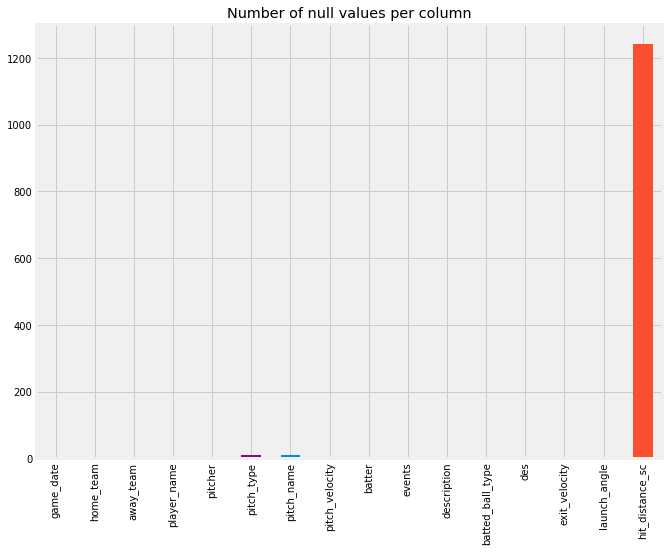

In [30]:
# Create a vertical bar plot by number of missing values per column using matplotlib
# Note: figsize: a tuple (width, height) in inches
cubs2016_new.isnull().sum().plot.bar(figsize=(10, 8));
plt.title('Number of null values per column');

### Summarize the DataFrame

In [31]:
# Describe numeric columns
# Generates descriptive summary statistics of the central tendency, dispersion, and shape of the distribution
# Note: By default only numeric (int64) fields are returned
#       Excludes "NaN" (missing) values
# Remove multiple columns
# Note: axis=0 for rows, 1 for columns
cubs2016_new.drop(['pitcher', 'batter'], axis=1).describe()

,pitch_velocity,exit_velocity,launch_angle,hit_distance_sc
count,8181.000000,8181.000000,8181.000000,6940.000000
mean,89.393680,87.296859,10.972319,174.390346
std,5.495297,14.131159,26.758411,134.205618
min,64.100000,17.200000,-82.128000,0.000000
25%,85.800000,80.500000,-9.430000,28.000000
50%,90.800000,89.100000,10.777000,178.000000
75%,93.300000,97.800000,29.178000,294.000000
max,104.200000,115.200000,87.462000,469.000000


In [32]:
# Describe object columns (e.g. categorical, strings, or timestamps)
# Generates descriptive summary statistics of the count, unique values, top values, and frequency
# Note: "top" is the most common value; "freq" is the most common value's frequency
#       Excludes "NaN" (missing) values
# Remove multiple columns
# Note: axis=0 for rows, 1 for columns
cubs2016_new.drop(['home_team', 'away_team', 'player_name', 'des'], axis=1).describe(include='object')

,game_date,pitch_type,pitch_name,events,description,batted_ball_type
count,8181,8170,8170,8181,8181,8181
unique,160,10,10,15,3,4
top,2016-08-16,FF,4-Seam Fastball,field_out,hit_into_play,ground_ball
freq,97,2742,2742,4887,5415,3774


In [33]:
# Compute a frequency table of two factors
pd.crosstab(cubs2016_new.pitch_name, cubs2016_new.pitch_type, margins=True, margins_name='Total')

pitch_type,CH,CU,FC,FF,FO,FS,FT,KC,SI,SL,Total
pitch_name,,,,,,,,,,,
2-Seam Fastball,0,0,0,0,0,0,1092,0,0,0,1092
4-Seam Fastball,0,0,0,2742,0,0,0,0,0,0,2742
Changeup,909,0,0,0,0,0,0,0,0,0,909
Curveball,0,597,0,0,0,0,0,0,0,0,597
Cutter,0,0,533,0,0,0,0,0,0,0,533
Forkball,0,0,0,0,3,0,0,0,0,0,3
Knuckle Curve,0,0,0,0,0,0,0,66,0,0,66
Sinker,0,0,0,0,0,0,0,0,1144,0,1144
Slider,0,0,0,0,0,0,0,0,0,1043,1043


#### Create indicator for whether an event was a Home Run (HR).

In [34]:
cubs2016_new.events.value_counts(dropna=False)

field_out                    4887
single                       1629
double                        498
home_run                      363
force_out                     239
grounded_into_double_play     205
field_error                   105
sac_bunt                       72
sac_fly                        71
triple                         45
double_play                    34
fielders_choice_out            24
fielders_choice                 7
sac_bunt_double_play            1
sac_fly_double_play             1
Name: events, dtype: int64

In [35]:
# Lambda function: apply an arbitrary function to each value of a Pandas column, storing the result in a new column
cubs2016_new['hr'] = cubs2016_new.events.apply(lambda events: 1 if events == 'home_run' else 0)

In [36]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
cubs2016_new.hr.value_counts(dropna=False)

0    7818
1     363
Name: hr, dtype: int64

#### Create indicator for whether an event was an Extra-base Hit (XBH).

In [37]:
# Check whether `values` are contained in Series
cubs2016_new['xbh_bool'] = cubs2016_new.events.isin(['double', 'triple', 'home_run'])

In [38]:
# Map values of Series using input correspondence (i.e., map existing input values to new outputs values)
cubs2016_new['xbh'] = cubs2016_new.xbh_bool.map({False:0, True:1})
cubs2016_new.drop('xbh_bool', axis=1, inplace=True)

In [39]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
cubs2016_new.xbh.value_counts(dropna=False)

0    7275
1     906
Name: xbh, dtype: int64

In [40]:
# Calculate the correlation matrix using the default method (Pearson correlation)
baseball_correlations = cubs2016_new.drop(['pitcher', 'batter'], axis=1).corr(method='pearson')
baseball_correlations

,pitch_velocity,exit_velocity,launch_angle,hit_distance_sc,hr,xbh
pitch_velocity,1.000000,0.079870,-0.000132,-0.000832,-0.004052,0.003270
exit_velocity,0.079870,1.000000,0.180957,0.336731,0.242632,0.311501
launch_angle,-0.000132,0.180957,1.000000,0.714838,0.146332,0.139132
hit_distance_sc,-0.000832,0.336731,0.714838,1.000000,0.386490,0.408771
hr,-0.004052,0.242632,0.146332,0.386490,1.000000,0.610602
xbh,0.003270,0.311501,0.139132,0.408771,0.610602,1.000000


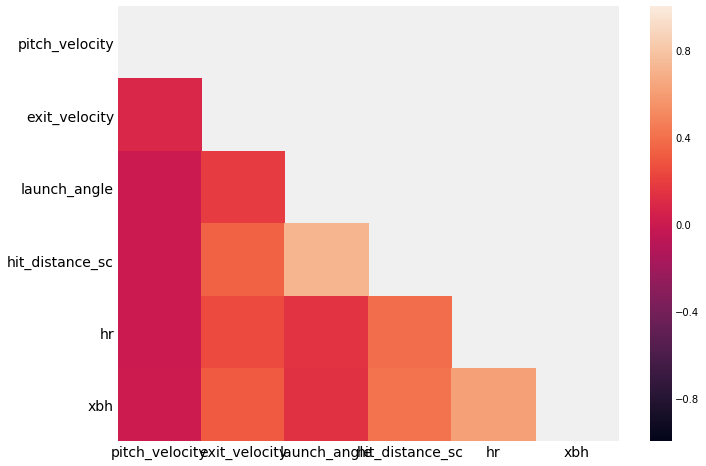

In [41]:
# Create a figure and a set of subplots
# Note: figsize: a tuple (width, height) in inches
fig, ax = plt.subplots(figsize=(10, 8));

# Return an array of zeros with the same shape and type as a given array
mask = np.zeros_like(baseball_correlations, dtype=np.bool)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True

# Plot the correlation matrix (color-encoded) using Seaborn's .heatmap() function
# Note: vmin, vmax: values to anchor the colormap, otherwise they are inferred from the data & other keyword arguments
ax = sns.heatmap(baseball_correlations, vmin=-1, vmax=1, mask=mask, ax=ax);

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14);
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14);

plt.show();

In [42]:
# For each HR group, describe exit velocity:
cubs2016_new.groupby(by='hr').exit_velocity.describe()

,count,mean,std,min,25%,50%,75%,max
hr,,,,,,,,
0,7818.0,86.558097,13.995522,17.2,80.0,88.4,96.8,115.2
1,363.0,103.207713,4.120800,88.8,100.8,103.1,106.0,114.1


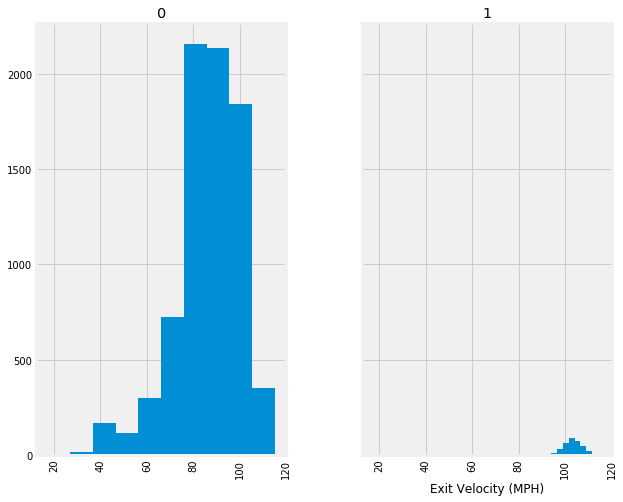

In [43]:
# Create histograms
# Note: column: used to limit data to a subset of columns
#       by: used to form histograms for separate groups
#       sharex: share x axis and set some x axis labels to invisible
#       sharey: share y axis and set some y axis labels to invisible
#       layout: tuple of (rows, columns) for the layout of the histograms
#       figsize: a tuple (width, height) in inches
cubs2016_new.hist(column='exit_velocity', by='hr', sharex=True, sharey=True, figsize=(10, 8));
plt.xlabel('Exit Velocity (MPH)');
plt.ylabel('Frequency');

In [44]:
# For each HR group, describe launch angle:
cubs2016_new.groupby(by='hr').launch_angle.describe()

,count,mean,std,min,25%,50%,75%,max
hr,,,,,,,,
0,7818.0,10.128640,27.054603,-82.128,-10.91975,9.1065,27.81225,87.462
1,363.0,29.142799,5.230193,17.005,25.25800,29.2110,32.73100,43.848


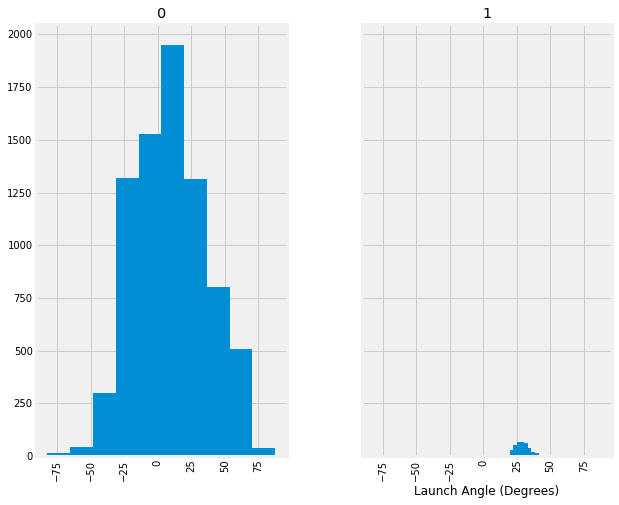

In [45]:
# Create histograms
# Note: column: used to limit data to a subset of columns
#       by: used to form histograms for separate groups
#       sharex: share x axis and set some x axis labels to invisible
#       sharey: share y axis and set some y axis labels to invisible
#       layout: tuple of (rows, columns) for the layout of the histograms
#       figsize: a tuple (width, height) in inches
cubs2016_new.hist(column='launch_angle', by='hr', sharex=True, sharey=True, figsize=(10, 8));
plt.xlabel('Launch Angle (Degrees)');
plt.ylabel('Frequency');

In [46]:
# For each XBH group, describe exit velocity:
cubs2016_new.groupby(by='xbh').exit_velocity.describe()

,count,mean,std,min,25%,50%,75%,max
xbh,,,,,,,,
0,7275.0,85.743546,13.934252,17.2,80.0,87.1,95.6,115.2
1,906.0,99.769647,8.318070,45.6,97.4,101.3,104.8,114.1


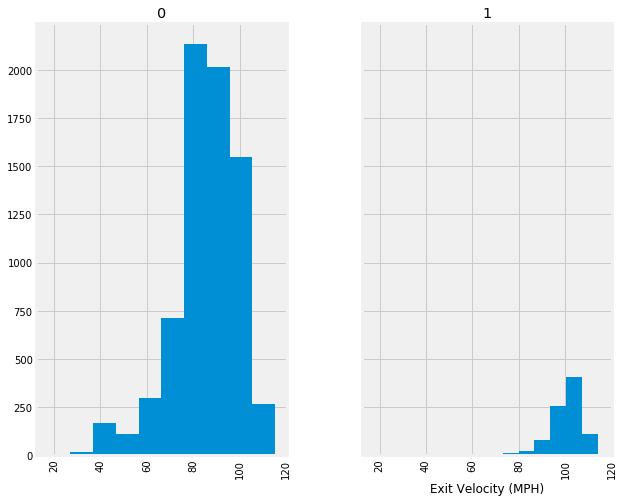

In [47]:
# Create histograms
# Note: column: used to limit data to a subset of columns
#       by: used to form histograms for separate groups
#       sharex: share x axis and set some x axis labels to invisible
#       sharey: share y axis and set some y axis labels to invisible
#       layout: tuple of (rows, columns) for the layout of the histograms
#       figsize: a tuple (width, height) in inches
cubs2016_new.hist(column='exit_velocity', by='xbh', sharex=True, sharey=True, figsize=(10, 8));
plt.xlabel('Exit Velocity (MPH)');
plt.ylabel('Frequency');

In [48]:
# For each XBH group, describe launch angle:
cubs2016_new.groupby(by='xbh').launch_angle.describe()

,count,mean,std,min,25%,50%,75%,max
xbh,,,,,,,,
0,7275.0,9.658581,27.832981,-82.128,-12.7135,7.6070,29.26850,87.462
1,906.0,21.521377,10.955461,-24.363,16.0595,22.4535,28.99775,62.069


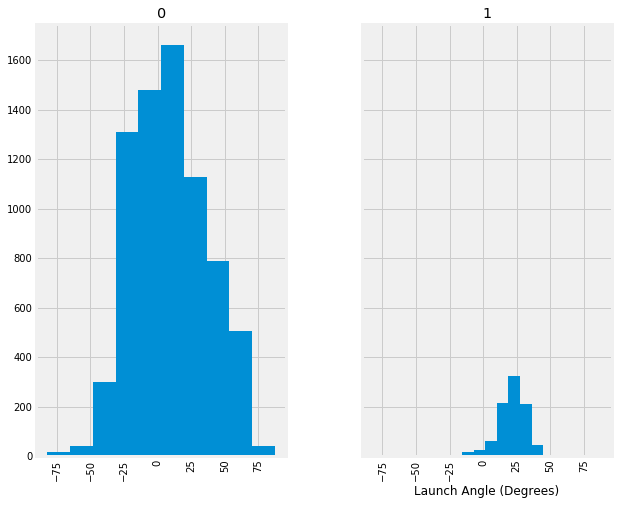

In [49]:
# Create histograms
# Note: column: used to limit data to a subset of columns
#       by: used to form histograms for separate groups
#       sharex: share x axis and set some x axis labels to invisible
#       sharey: share y axis and set some y axis labels to invisible
#       layout: tuple of (rows, columns) for the layout of the histograms
#       figsize: a tuple (width, height) in inches
cubs2016_new.hist(column='launch_angle', by='xbh', sharex=True, sharey=True, figsize=(10, 8));
plt.xlabel('Launch Angle (Degrees)');
plt.ylabel('Frequency');

In [50]:
# Create a list of features
feature_cols = ['pitch_type', 'pitch_velocity', 'exit_velocity', 'launch_angle']

In [51]:
# Create X and y
X = cubs2016_new[feature_cols]
y = cubs2016_new.hr